<a href="https://colab.research.google.com/github/pomorski-cpu/FCC_ML/blob/main/switch_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime as dt

В данном датасете данные о играх, которые лучше всего продаются для Nintendo Switch

In [3]:
swsale = pd.read_csv('best_selling_switch_games.csv')
swsale.head()


,title,copies_sold,genre,developer,publisher,as_of,release_date
0,Mario Kart 8 Deluxe,48410000.0,Kart racing,Nintendo EPD,Nintendo,2022-09-30,2017-04-28
1,Animal Crossing: New Horizons,40170000.0,Social simulation,Nintendo EPD,Nintendo,2022-09-30,2020-03-20
2,Super Smash Bros. Ultimate,29530000.0,Fighting,Bandai Namco StudiosSora Ltd.,Nintendo,2022-09-30,2018-12-07
3,The Legend of Zelda: Breath of the Wild,27790000.0,Action-adventure,Nintendo EPD,Nintendo,2022-09-30,2017-03-03
4,Pokémon Sword and Shield,25370000.0,Role-playing,Game Freak,The Pokémon CompanyNintendo,2022-09-30,2019-11-15


В этом анализе я хочу узнать 
1)10 самых продаваемых игр
2)5 самых продаваемых жанров
3)Число копий проданных с 2017 по 2020
4)Число копий для каждого отдельного девелопера
5)Лучшие игры каждого девелопера

<b> 10 самых продаваемых игр <b>

In [4]:
top_10_games = swsale[['copies_sold','title']].sort_values(by=['copies_sold'], ascending=False).head(10)


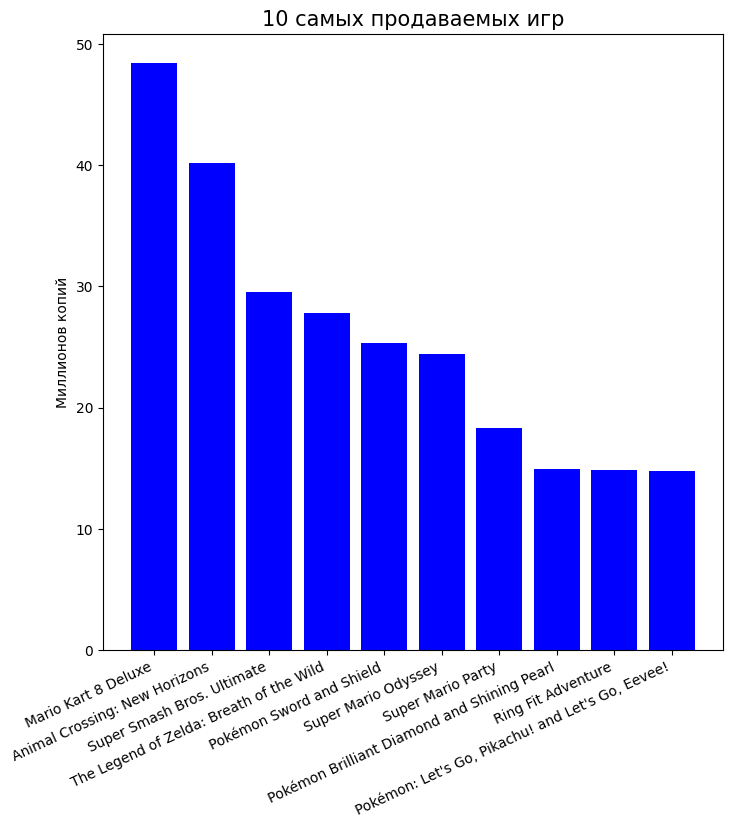

In [5]:
plt.figure(figsize=(8,8))
plt.bar(top_10_games['title'], top_10_games['copies_sold'] / 1000000,color = 'b')
plt.title('10 самых продаваемых игр', fontsize=15)
plt.ylabel('Миллионов копий')
plt.xticks(rotation=25, ha='right') 
plt.show()


<b>5 самых продаваемых жанров<b>

In [15]:
top_5_genre = swsale.groupby('genre')['copies_sold'].sum().sort_values(ascending=False).reset_index().head(5)

top_5_genre[['genre','copies_sold']]


,genre,copies_sold
0,Role-playing,69940000.0
1,Platformer,63520000.0
2,Action-adventure,52110000.0
3,Kart racing,48410000.0
4,Social simulation,40170000.0


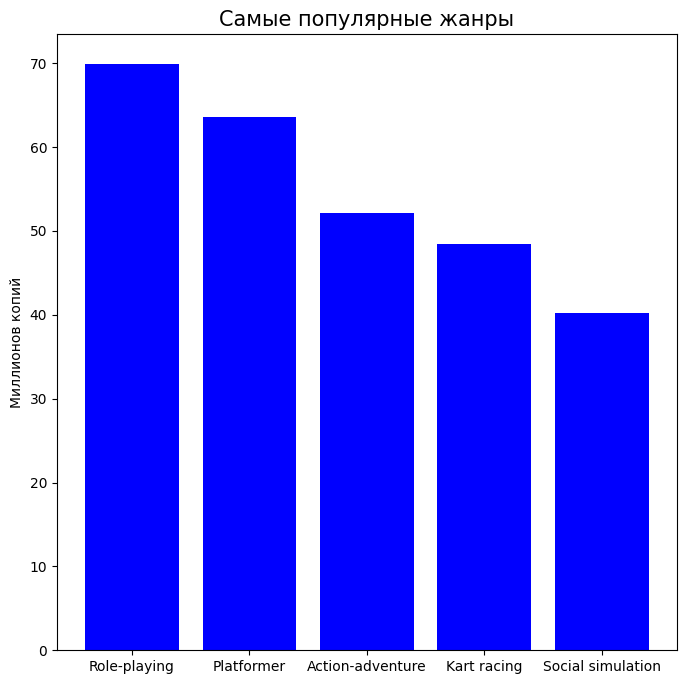

In [7]:
plt.figure(figsize=(8,8))
plt.bar(top_5_genre['genre'],top_5_genre['copies_sold']/1000000,color = 'b')
plt.title('Самые популярные жанры', fontsize=15)
plt.ylabel('Миллионов копий')

plt.show()


<b>Число копий проданных с 2018 по 2022
<B>

In [8]:
swsale['as_of'] = pd.to_datetime(swsale['as_of'])
swsale['year'] = swsale['as_of'].dt.year.astype('int')

sales_2018_2022 = swsale.groupby('year')['copies_sold'].sum().reset_index()
sales_2018_2022



,year,copies_sold
0,2018,2000000.0
1,2019,1000000.0
2,2020,5620000.0
3,2021,86260000.0
4,2022,400710000.0


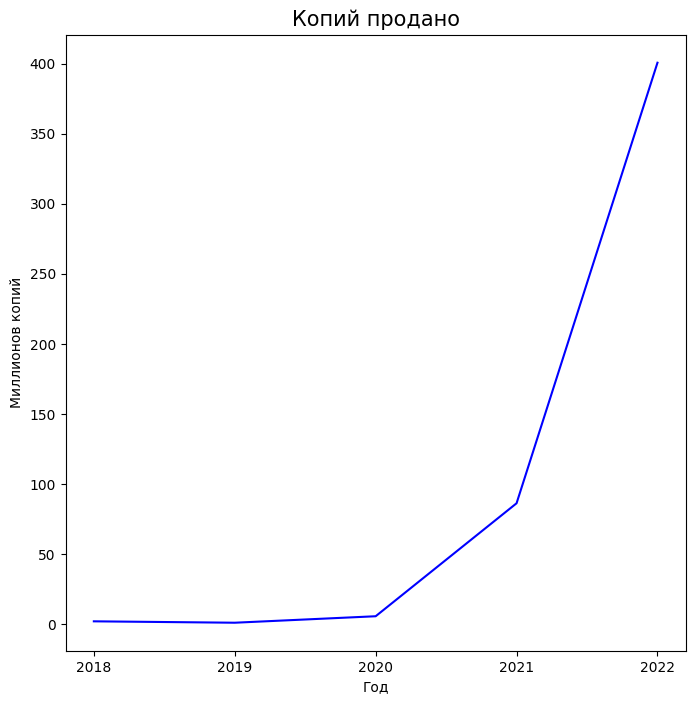

In [9]:
plt.figure(figsize=(8,8))
plt.plot(sales_2018_2022['year'],sales_2018_2022['copies_sold']/1000000,color = 'b')
plt.title('Копий продано', fontsize=15)
plt.ylabel('Миллионов копий')
plt.xlabel('Год')
plt.xticks(range(2018,2023))

plt.show()



<b>** Число копий, проданных каждым отдельным девелопером **<b>

In [10]:
dev_sold = swsale.groupby('developer')['copies_sold'].sum().sort_values(ascending= False).reset_index()
dev_sold

,developer,copies_sold
0,Nintendo EPD,226110000.0
1,Game Freak,64090000.0
2,NDcube,30640000.0
3,Bandai Namco StudiosSora Ltd.,29530000.0
4,ILCA,14920000.0
5,Next Level Games,13600000.0
6,HAL Laboratory,9250000.0
7,Nintendo,9070000.0
8,Capcom,8900000.0
9,Grezzo,7760000.0


In [11]:
dev_list = dev_sold['developer'].head(5).to_list()
dev_list.append('Другие разработчики')
copies_sold = dev_sold['copies_sold'].head(5).to_list()
other_dev_sold = dev_sold['copies_sold'].sum() - dev_sold['copies_sold'].head(5).sum()
copies_sold.append(other_dev_sold)
top5_and_other_sold = pd.DataFrame(list(zip(dev_list,copies_sold)),columns=['Разработчик','Копий продано'])
top5_and_other_sold

,Разработчик,Копий продано
0,Nintendo EPD,226110000.0
1,Game Freak,64090000.0
2,NDcube,30640000.0
3,Bandai Namco StudiosSora Ltd.,29530000.0
4,ILCA,14920000.0
5,Другие разработчики,130300000.0


Text(0.5, 1.0, '5 лучших по продажам разработчиков')

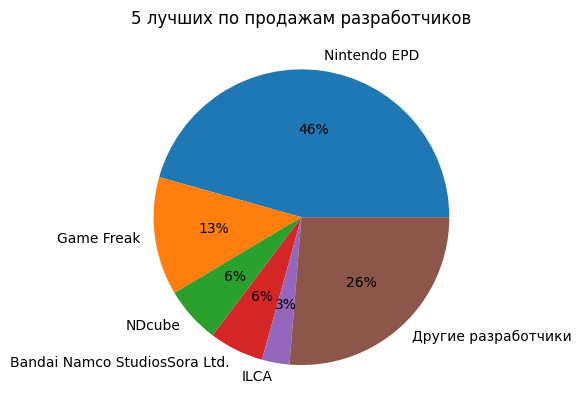

In [12]:
plt.plot(figsize=(8,8))
plt.pie(top5_and_other_sold['Копий продано'],labels = top5_and_other_sold['Разработчик'],autopct='%.0f%%')
plt.title('5 лучших по продажам разработчиков')


<b>Лучшие игры каждого девелопера<b>

In [14]:
best_games = swsale.groupby('developer')['copies_sold'].idxmax()
best_games_df = swsale.loc[best_games, ['developer', 'title', 'copies_sold']].sort_values(by=['copies_sold'])
best_games_df


,developer,title,copies_sold
71,Marvelous,Story of Seasons: Pioneers of Olive Town,1000000.0
70,Atlus,Shin Megami Tensei V,1000000.0
72,Noble Muffins,Thief Simulator,1000000.0
66,Dodge Roll,Enter the Gungeon,1000000.0
68,Imagineer,Fitness Boxing,1000000.0
62,"Nintendo EPD, indieszero",Dr Kawashima's Brain Training for Nintendo Switch,1200000.0
61,CyberConnect2,Naruto Shippudden: Ultimate Ninja Storm Trilogy,1260000.0
60,Nintendo EPDIntelligent Systems,WarioWare: Get It Together!,1270000.0
59,PlatinumGames,Astral Chain,1280000.0
57,Team Ninja,Marvel Ultimate Alliance 3: The Black Order,1500000.0
